In [77]:
from os import walk
import os
import pandas as pd
import subprocess
import sys
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
import time
import json
import re
import urllib2
import unicodedata
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize

wordnet_tags = ['n', 'v', 'a', 's', 'r']
%matplotlib inline


# The main code, built from testing, is in the cell immediately below. 

In [162]:
# from http://brandonrose.org/clustering



from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
stemmer = SnowballStemmer("english")
lemmer = WordNetLemmatizer()
wordnet_tags = ['n', 'v', 'a', 's', 'r']

def tokenize_and_stem_n_lem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    ''' 
    Old code gave seperate lists for lem and stem; I lemmed, then just stemmed the result
    #stems = [stemmer.stem(t) for t in filtered_tokens]
    #lems = [lemmer.lemmatize(l) for l in filtered_tokens]
    '''
    stems = [stemmer.stem(lemmer.lemmatize(l)) for l in filtered_tokens]
    
    #return stems,lems
    return stems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [360]:
path        = os.path.abspath(os.getcwd())
TESTDIR     = os.path.normpath(os.path.join(os.path.expanduser("~"),"projects","LC3-Creations", "examples","KDDsample"))

corpus = {}

start_time = time.time()
for dirName, subdirList, fileList in walk(TESTDIR):
        for fileName in fileList:
            if fileName.startswith('p') and fileName.endswith('.pdf'):
                a = unicode(subprocess.check_output(['pdf2txt.py',str(os.path.normpath(os.path.join(TESTDIR,fileName)))]),errors='ignore')
                document = unicodedata.normalize('NFKD', a).encode('ascii','ignore')
                
                if len(document)<300:
                    pass
                else:
                    
                    # The entire document
                    body = re.sub('[\s]'," ",document)
                    
                    # Getting title
                    title = re.findall("^[^\\n\\n]+",document)[0]

                    # Getting the abstract
                    try:
                        abstract = re.findall (r'(Abstract|ABSTRACT)([^]]*)\n',document[:2000])
                    except IndexError:
                        abstract = re.findall (r'(Abstract|ABSTRACT)([^]]*)\n',document[:2000])[0]
                    else:
                        abstract = abstract = re.findall (r'(Abstract|ABSTRACT)([^]]*)\n',document[:2000])[0][1]
                    
                    if isinstance(abstract, tuple):
                        abstract = re.sub('[\s]'," ",abstract[1])
                    elif isinstance(abstract,list):
                        abstract = re.sub('[\s]'," ",abstract[1])
                    elif isinstance(abstract,str):
                        abstract = re.sub('[\s]'," ", abstract)





                    # Extracts section with names and email addresses only
                    section  = re.findall (r'\n\n([^]]*)\n\n(Abstract|ABSTRACT)',document[:2000])

                    type(section[0][0])

                    if isinstance(section, list):
                        section = re.sub('[\s]'," ",section[0][0])
                    else:
                        section = re.sub('[\s]'," ",section)


                    # Code to extract entities from top section of pdf and store a relationship tree
                    tagged = nltk.pos_tag(nltk.word_tokenize(section))
                    entities = nltk.chunk.ne_chunk(tagged)

                    # Another entity extractor
                    st = StanfordNERTagger('/Users/linwood/stanford-corenlp-full-2015-04-20/classifiers/english.conll.4class.distsim.crf.ser.gz',
                           '/Users/linwood/stanford-corenlp-full-2015-04-20/stanford-corenlp-3.5.2.jar',
                           encoding='utf-8')
                    tokenized_text = word_tokenize(section)
                    stanentities = st.tag(tokenized_text)

                    # Calls function to lemmatize and stem the document; stores the result
                    tokenize_and_stem_n_lem(abstract);

                    '''
                    This gives seperate lists for lem and stem; replacement code stores combin
                    # Creates the json document format to store the files
                    corpus[str(fileName)]={}
                    corpus[str(fileName)]={'Title':title,'Abstract':abstract,'Entities':entities, 
                                           "Stanford ER":stanentities, "Stems": tokenize_and_stem_n_lem(abstract)[0], 
                                          "Lems": tokenize_and_stem_n_lem(abstract)[1]}'''

                    # Creates the json document format to store the files
                    corpus[str(fileName)]={}
                    corpus[str(fileName)]={'Title':title,'body'=body,'Abstract':abstract,'Entities':entities,
                                           "Stanford ER":stanentities, "Stems": tokenize_and_stem_n_lem(abstract)}
                    print ".",

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

CalledProcessError: Command '['pdf2txt.py', '/Users/linwood/projects/LC3-Creations/examples/KDDsample/p1.pdf']' returned non-zero exit status 1

# Placeholder to see the output of the code above; make sure it does what I want; this will be converted and stored as json document

In [362]:
# Remove the semicolon to see the output
len(corpus.keys())

83

# Testing/building individual compents happens below; then I paste it above

In [527]:
[i['Abstract'] for i in corpus.values()[:]];

In [340]:
f = unicode(subprocess.check_output(['pdf2txt.py',str(os.path.normpath(os.path.join(os.path.expanduser("~"),"projects","LC3-Creations", "examples","KDDsample","p627.pdf")))]),errors='ignore')
fd = unicodedata.normalize('NFKD', f).encode('ascii','ignore')
print len(fd)

44707


In [589]:
#re.findall(r'?<=(Abstract|ABSTRACT)(.*)',fd[:2000])
re.findall('[\w]+', fd)

['Reducing',
 'the',
 'Unlabeled',
 'Sample',
 'Complexity',
 'of',
 'Semi',
 'Supervised',
 'Multi',
 'view',
 'Learning',
 'Chao',
 'Lan',
 'clan',
 'ittc',
 'ku',
 'edu',
 'Jun',
 'Huan',
 'jhuan',
 'ittc',
 'ku',
 'edu',
 'School',
 'of',
 'Engineering',
 'University',
 'of',
 'Kansas',
 'Lawrence',
 'KS',
 '66047',
 'USA',
 'ABSTRACT',
 'In',
 'semi',
 'supervised',
 'multi',
 'view',
 'learning',
 'unlabeled',
 'sample',
 'com',
 'plexity',
 'u',
 's',
 'c',
 'species',
 'the',
 'size',
 'of',
 'unlabeled',
 'training',
 'sample',
 'that',
 'guarantees',
 'a',
 'desired',
 'learning',
 'error',
 'In',
 'this',
 'paper',
 'we',
 'improve',
 'the',
 'state',
 'of',
 'art',
 'u',
 's',
 'c',
 'from',
 'O',
 '1',
 'to',
 'O',
 'log',
 '1',
 'for',
 'small',
 'error',
 'under',
 'mild',
 'conditions',
 'To',
 'obtain',
 'the',
 'improved',
 'result',
 'as',
 'a',
 'primary',
 'step',
 'we',
 'prove',
 'a',
 'connection',
 'between',
 'the',
 'generalization',
 'error',
 'of',
 'a',
 '

In [575]:
try:
    abstr = re.findall((r'(Abstract|ABSTRACT)([^]]*)',fd[:2000])
except IndexError:
    abstr = re.findall (r'(Abstract|ABSTRACT)([^]]*)',fd[:2000])[0]
except IndexError:
    abstr = re.findall (r'(Abstract|ABSTRACT)([^]]*)',fd[:2000])[0][1]
else :
    abstr = "We are unable to parse the abstract of %s, with title %s; Check file for abstract" % (fileName,title)

if isinstance(abstract, tuple):
    abstr = re.sub('[\s]'," ",abstr[1])
elif isinstance(abstract,list):
    abstr = re.sub('[\s]'," ",abstr[1])
elif isinstance(abstract,str):
    abstr = re.sub('[\s]'," ", abstr)

else:
    abstr = "We are unable to parse the abstract of %s, with title %s; Check file for abstract" % (fileName,title)



SyntaxError: invalid syntax (<ipython-input-575-facff69b7552>, line 3)

In [343]:
try:
    abstract = re.findall (r'\n\n(Abstract|ABSTRACT)([^]]*)\n\n',document[:2000])
except IndexError:
    abstract = re.findall (r'(Abstract|ABSTRACT)([^]]*)',document[:2000])[0][1]
except IndexError:
    abstract = re.findall()
else:
    abstract = re.findall (r'(Abstract|ABSTRACT)([^]]*)',document[:2000])[0]
    
if isinstance(abstract, tuple):
    abstract = re.sub('[\s]'," ",abstract[1])
elif isinstance(abstract,list):
    abstract = re.sub('[\s]'," ",abstract[0])
elif isinstance(abstract,str):
    abstract = re.sub('[\s]'," ", abstract)
else:
    abstract = re.sub('[\s]'," ",abstract)
        
abstract

IndexError: list index out of range

In [529]:
body = re.sub('[\s]'," ",document)

'Using TF-IDF to Determine Word Relevance in Document Queries   Juan Ramos  Department of Computer Science, Rutgers University, 23515 BPO Way, Piscataway, NJ, 08855       JURAMOS@EDEN.RUTGERS.EDU   Abstract   In this paper, we examine the results of applying  Term  Frequency  Inverse  Document  Frequency  (TF-IDF) to determine what words in a corpus of  documents might be more favorable to use in a  query.    As  the  term implies, TF-IDF  calculates  values for each word in a document through an  inverse proportion of the frequency of the word  in  a  particular  document  to  the  percentage  of  documents  the  word  appears  in.    Words  with  high  TF-IDF  numbers  strong  relationship  with  the  document  they  appear  in,  suggesting that if that word were to appear in a  query, the document could  be  of interest to the  user.    We  provide  evidence  that  this  simple  algorithm  efficiently  categorizes  relevant  words  that can enhance query retrieval.   imply   a   1. 

In [252]:
re.findall (r'\n \n([^]]*\n)',a[:2000])

[]

In [166]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print 'there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame'

there are 901 items in vocab_frame


In [293]:
# remove semicolon to see output
corpus.keys()

['p507.pdf',
 'p627.pdf',
 'p895.pdf',
 'p597.pdf',
 'p785.pdf',
 'p825.pdf',
 'p695.pdf',
 'p289.pdf',
 'p417.pdf',
 'p447.pdf',
 'p269.pdf',
 'p915.pdf',
 'p497.pdf',
 'p765.pdf',
 'p387.pdf',
 'p19.pdf',
 'p359.pdf',
 'p557.pdf',
 'p745.pdf',
 'p339.pdf',
 'p675.pdf',
 'p617.pdf',
 'p715.pdf',
 'p259.pdf',
 'p537.pdf',
 'p865.pdf',
 'p407.pdf',
 'p477.pdf',
 'p487.pdf',
 'p329.pdf',
 'p457.pdf',
 'p607.pdf',
 'p299.pdf',
 'p855.pdf',
 'p349.pdf',
 'p1005.pdf',
 'p437.pdf',
 'p249.pdf',
 'p517.pdf',
 'p875.pdf',
 'p587.pdf',
 'p59.pdf',
 'p905.pdf',
 'p725.pdf',
 'p379.pdf',
 'p527.pdf',
 'p755.pdf',
 'p577.pdf',
 'p805.pdf',
 'p239.pdf',
 'p685.pdf',
 'p397.pdf',
 'p845.pdf',
 'p665.pdf',
 'p427.pdf',
 'p279.pdf',
 'p645.pdf',
 'p835.pdf',
 'p467.pdf',
 'p635.pdf',
 'p29.pdf',
 'p309.pdf',
 'p655.pdf',
 'p39.pdf',
 'p705.pdf',
 'p567.pdf',
 'p219.pdf',
 'p815.pdf',
 'p547.pdf',
 'p229.pdf',
 'p885.pdf',
 'p735.pdf',
 'p369.pdf',
 'p319.pdf',
 'p775.pdf']

Example of how to access values in document store and attributes of each document for processing

In [51]:
corpus['p59.pdf'].keys()

['Title', 'Abstract', 'Entities', 'Stems', 'Lems', 'Stanford ER']

In [376]:
len(abstracts)

83

In [7]:
# Convert document from unicode to string 

import unicodedata
document = unicodedata.normalize('NFKD', a).encode('ascii','ignore')
document[:2500]

'Using TF-IDF to Determine Word Relevance in Document Queries \n\nJuan Ramos \nDepartment of Computer Science, Rutgers University, 23515 BPO Way, Piscataway, NJ, 08855 \n \n \n\nJURAMOS@EDEN.RUTGERS.EDU \n\nAbstract \n\nIn this paper, we examine the results of applying \nTerm  Frequency  Inverse  Document  Frequency \n(TF-IDF) to determine what words in a corpus of \ndocuments might be more favorable to use in a \nquery.    As  the  term implies, TF-IDF  calculates \nvalues for each word in a document through an \ninverse proportion of the frequency of the word \nin  a  particular  document  to  the  percentage  of \ndocuments  the  word  appears  in.    Words  with \nhigh  TF-IDF  numbers \nstrong \nrelationship  with  the  document  they  appear  in, \nsuggesting that if that word were to appear in a \nquery, the document could  be  of interest to the \nuser.    We  provide  evidence  that  this  simple \nalgorithm  efficiently  categorizes  relevant  words \nthat can enhance query r

In [8]:
# Getting title
title = re.findall("^[^\\n\\n]+",document)[0]
title

# Getting the abstract
abstract = re.findall (r'\n\n(Abstract|ABSTRACT)([^]]*)\n\n',document[:2000])[0]

if isinstance(abstract, tuple):
    abstract = re.sub('[\s]'," ",abstract[1])
else:
    abstract = re.sub('[\s]'," ",abstract)
abstract

'   In this paper, we examine the results of applying  Term  Frequency  Inverse  Document  Frequency  (TF-IDF) to determine what words in a corpus of  documents might be more favorable to use in a  query.    As  the  term implies, TF-IDF  calculates  values for each word in a document through an  inverse proportion of the frequency of the word  in  a  particular  document  to  the  percentage  of  documents  the  word  appears  in.    Words  with  high  TF-IDF  numbers  strong  relationship  with  the  document  they  appear  in,  suggesting that if that word were to appear in a  query, the document could  be  of interest to the  user.    We  provide  evidence  that  this  simple  algorithm  efficiently  categorizes  relevant  words  that can enhance query retrieval.   imply   a   1.  Introduction  Before  proceeding  in  depth  into  our  experiments,  it  is  useful  to  describe  the  nature  of  the  query  retrieval  problem  for  a  corpus  of  documents  and  the  different  app

In [9]:
# Extracts section with names and email addresses only

section  = re.findall (r'\n\n([^]]*)\n\n(Abstract|ABSTRACT)',document[:2000])

type(section[0][0])

if isinstance(section, list):
    section = re.sub('[\s]'," ",section[0][0])
else:
    section = re.sub('[\s]'," ",section)
section


'Juan Ramos  Department of Computer Science, Rutgers University, 23515 BPO Way, Piscataway, NJ, 08855       JURAMOS@EDEN.RUTGERS.EDU '

In [ ]:
test = re.findall (r'\n\n([^]]+)\n\n(Abstract|ABSTRACT)',document[:2000] )

if isinstance(test, str):
    print "Wow"
elif isinstance (test,int):
    print "I'm surprised!"

elif  isinstance (test,list):
    print "We got it RIGHT!"

else:
    print "Nothing fits"


In [268]:
# Code to extract entities from top section of pdf and store a relationship tree

import nltk

tagged = nltk.pos_tag(nltk.word_tokenize(section))
entities = nltk.chunk.ne_chunk(tagged)
entities.collapse_unary

<bound method Tree.collapse_unary of Tree('S', [('Relationships', 'NNS'), ('in', 'IN'), ('Multi-Label', 'NNP'), ('Learning', 'NNP'), Tree('PERSON', [('Christina', 'NNP'), ('Papagiannopoulou', 'NNP'), ('School', 'NNP')]), ('of', 'IN'), Tree('ORGANIZATION', [('Informatics', 'NNP'), ('Aristotle', 'NNP'), ('University', 'NNP')]), ('of', 'IN'), ('Thessaloniki', 'NNP'), ('Thessaloniki', 'NNP'), ('54124', 'CD'), (',', ','), Tree('GPE', [('Greece', 'NNP')]), ('cppapagi', 'NN'), ('@', ':'), ('gmail.com', 'JJ'), ('Grigorios', 'NNS'), Tree('PERSON', [('Tsoumakas', 'NNP'), ('School', 'NNP')]), ('of', 'IN'), Tree('ORGANIZATION', [('Informatics', 'NNP'), ('Aristotle', 'NNP'), ('University', 'NNP')]), ('of', 'IN'), ('Thessaloniki', 'NNP'), ('Thessaloniki', 'NNP'), ('54124', 'CD'), (',', ','), Tree('GPE', [('Greece', 'NNP')]), ('greg', 'NN'), ('@', ':'), ('csd.auth.gr', 'JJ'), Tree('PERSON', [('Ioannis', 'NNP')]), ('Tsamardinos1,2', 'NNP'), ('1Computer', 'CD'), ('Science', 'NNP'), ('Dept.', 'NNP'), ('

In [20]:
# Use another entity extractor


from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize

st = StanfordNERTagger('/Users/linwood/stanford-corenlp-full-2015-04-20/classifiers/english.conll.4class.distsim.crf.ser.gz',
					   '/Users/linwood/stanford-corenlp-full-2015-04-20/stanford-corenlp-3.5.2.jar',
					   encoding='utf-8')

text = section
tokenized_text = word_tokenize(section)
classified_text = st.tag(tokenized_text)

print(classified_text)

[(u'Juan', u'ORGANIZATION'), (u'Ramos', u'ORGANIZATION'), (u'Department', u'ORGANIZATION'), (u'of', u'ORGANIZATION'), (u'Computer', u'ORGANIZATION'), (u'Science', u'ORGANIZATION'), (u',', u'O'), (u'Rutgers', u'ORGANIZATION'), (u'University', u'ORGANIZATION'), (u',', u'O'), (u'23515', u'O'), (u'BPO', u'MISC'), (u'Way', u'MISC'), (u',', u'O'), (u'Piscataway', u'LOCATION'), (u',', u'O'), (u'NJ', u'LOCATION'), (u',', u'O'), (u'08855', u'O'), (u'JURAMOS', u'O'), (u'@', u'O'), (u'EDEN.RUTGERS.EDU', u'O')]


In [284]:
# Creates the json document format to store the files

corpus = {}
corpus[str(fileName)]={}
corpus[str(fileName)]={'Title':title,'Abstract':abstract,'Entities':entities}
corpus['p99.pdf']={'Title':"Test title",'Abstract':"test abstract langauge.  Just adding test to make it longer", 'Entities':"Linwood Creekmore"}

corpus.keys()

corpus

['p99.pdf', 'p925.pdf']

In [285]:
# Testing how to use the Stanford NER Tagger

from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize

st = StanfordNERTagger('/Users/linwood/stanford-corenlp-full-2015-04-20/classifiers/english.muc.7class.distsim.crf.ser.gz',
					   '/Users/linwood/stanford-corenlp-full-2015-04-20/stanford-ner-3.5.2.jar',
					   encoding='utf-8')

st.tag(word_tokenize(section));

In [449]:
# from http://brandonrose.org/clustering



from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
stemmer = SnowballStemmer("english")
lemmer = WordNetLemmatizer()
wordnet_tags = ['n', 'v', 'a', 's', 'r']

def tokenize_and_stem_n_lem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stemmedlems = [lemmer.lemmatize(stemmer.stem(t)) for t in filtered_tokens]
    lems = [lemmer.lemmatize(l) for l in filtered_tokens]
    
    return stemmedlems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [461]:
# Creating lists for abstracts, titles, and entities

abstracts = [i['Abstract'] for i in corpus.values()[:]]
titles = [i['Title'] for i in corpus.values()[:]]
ents = [i['Entities'] for i in corpus.values()[:]]


totalvocab_stemmed = []
totalvocab_tokenized = []
for i in abstracts:
    allwords_stemmed = tokenize_and_stem_n_lem(i) #for some reason, had to add index in list here
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [447]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, ngram_range=(1,3))
print vectorizer.fit_transform(abstracts).todense()

[[ 0.17146428  0.16828501  0.         ...,  0.14916638  0.          0.        ]
 [ 0.21066584  0.          0.         ...,  0.          0.2331633
   0.22349326]
 [ 0.          0.          0.         ...,  0.17149221  0.          0.20913053]
 ..., 
 [ 0.          0.          0.         ...,  0.48691254  0.          0.        ]
 [ 0.11914226  0.          0.         ...,  0.10364852  0.13186572  0.        ]
 [ 0.          0.16023784  0.34641254 ...,  0.28406686  0.18070051  0.        ]]


In [451]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print 'there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame'

there are 16488 items in vocab_frame


In [435]:
type(abstracts[0])

str

In [453]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem_n_lem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(abstracts) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

CPU times: user 1.12 s, sys: 139 ms, total: 1.26 s
Wall time: 1.16 s
(83, 56)


In [456]:
terms = tfidf_vectorizer.get_feature_names()
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print dist

[[  0.00000000e+00   7.57285856e-01   8.55456992e-01 ...,   8.10228320e-01
    7.92196685e-01   8.94651464e-01]
 [  7.57285856e-01   1.11022302e-16   6.51007760e-01 ...,   8.29244427e-01
    7.73230612e-01   6.08082072e-01]
 [  8.55456992e-01   6.51007760e-01   0.00000000e+00 ...,   6.79580194e-01
    7.92530515e-01   9.37545580e-01]
 ..., 
 [  8.10228320e-01   8.29244427e-01   6.79580194e-01 ...,  -2.22044605e-16
    4.55010779e-01   6.04193138e-01]
 [  7.92196685e-01   7.73230612e-01   7.92530515e-01 ...,   4.55010779e-01
   -2.22044605e-16   8.35652381e-01]
 [  8.94651464e-01   6.08082072e-01   9.37545580e-01 ...,   6.04193138e-01
    8.35652381e-01   0.00000000e+00]]


In [490]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()
print len(km.labels_.tolist())
frame['cluster'] = np.asarray(km.labels_.tolist())
frame


CPU times: user 76.9 ms, sys: 3.25 ms, total: 80.2 ms
Wall time: 78.3 ms
83


,title,abstract,clusters,cluster
0,Locally Densest Subgraph Discovery,Mining dense subgraphs from a large graph is ...,NaN,2
1,Collective Opinion Spam Detection:,Online reviews capture the testimonials of re...,NaN,4
2,Deep Computational Phenotyping,We apply deep learning to the problem of disc...,NaN,3
3,Reducing the Unlabeled Sample Complexity of,"In semi-supervised multi-view learning, unlab...",NaN,3
4,Non-transitive Hashing with Latent Similarity ...,Approximating the semantic similarity between...,NaN,0
5,State-Driven Dynamic Sensor Selection and Pred...,An important problem in large-scale sensor mi...,NaN,3
6,From Group to Individual Labels using Deep Fea...,In many classication problems labels are rela...,NaN,3
7,Inferring Networks of Substitutable,"In a modern recommender system, it is importa...",NaN,3
8,Graph Query Reformulation with Diversity,We study a problem of graph-query reformulati...,NaN,3
9,A Learning-based Framework to Handle Multi-round,Considering nowadays companies providing simi...,NaN,0


In [502]:
frame.groupby('cluster').abstract.count()

cluster
0     8
1    23
2    10
3    24
4    18
Name: abstract, dtype: int64

In [526]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :15]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame.ix[i]['title']:
        print ('%s' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: network, model, propose, graph, provide, problem, ing, method, work, many, algorithm, framework, data, however, subject,

Cluster 0 titles:Locally Densest Subgraph Discovery

Cluster 1 words: data, model, used, method, set, propose, based, task, provide, paper, has, problem, algorithm, approach, categories,

Cluster 1 titles:Collective Opinion Spam Detection:

Cluster 2 words: graph, data, new, used, problem, network, method, set, application, studies, algorithm, develop, large, analysis, time,

Cluster 2 titles:Deep Computational Phenotyping

Cluster 3 words: learning, prediction, approach, data, problem, make, used, resulting, method, model, based, framework, descriptors, propose, challenges,

Cluster 3 titles:Reducing the Unlabeled Sample Complexity of

Cluster 4 words: algorithm, method, users, performed, used, problem, information, datasets, approach, evaluate, existing, large, present, detection, propose,

Cluster 4 titles:Non-transitive H

In [504]:
for i in frame[]

'Collective Opinion Spam Detection:'

In [479]:
kdd2015 = { 'title': titles, 'abstract': abstracts, 'cluster': clusters}

frame = pd.DataFrame(kdd2015, columns = ['title', 'abstract', 'clusters'])
frame

,title,abstract,clusters
0,Locally Densest Subgraph Discovery,Mining dense subgraphs from a large graph is ...,NaN
1,Collective Opinion Spam Detection:,Online reviews capture the testimonials of re...,NaN
2,Deep Computational Phenotyping,We apply deep learning to the problem of disc...,NaN
3,Reducing the Unlabeled Sample Complexity of,"In semi-supervised multi-view learning, unlab...",NaN
4,Non-transitive Hashing with Latent Similarity ...,Approximating the semantic similarity between...,NaN
5,State-Driven Dynamic Sensor Selection and Pred...,An important problem in large-scale sensor mi...,NaN
6,From Group to Individual Labels using Deep Fea...,In many classication problems labels are rela...,NaN
7,Inferring Networks of Substitutable,"In a modern recommender system, it is importa...",NaN
8,Graph Query Reformulation with Diversity,We study a problem of graph-query reformulati...,NaN
9,A Learning-based Framework to Handle Multi-round,Considering nowadays companies providing simi...,NaN


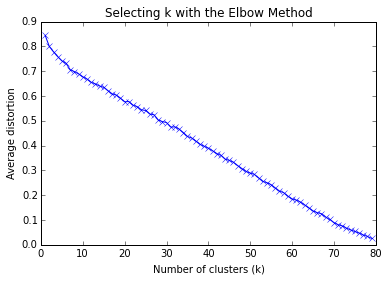

In [475]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

K = range(1,80)
meandisortions = []

for k in K:
	kmeans = KMeans(n_clusters = k)
	kmeans.fit(tfidf_matrix.todense())
	meandisortions.append(sum(np.min(cdist(tfidf_matrix.todense(),kmeans.cluster_centers_,'euclidean'),axis=1))/tfidf_matrix.todense().shape[0])

plt.plot(K,meandisortions,'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [470]:
tfidf_matrix.todense()

matrix([[ 0.11065384,  0.        ,  0.07155162, ...,  0.13057627,
          0.        ,  0.        ],
        [ 0.14205952,  0.        ,  0.        , ...,  0.        ,
          0.19460852,  0.19460852],
        [ 0.        ,  0.        ,  0.18234073, ...,  0.11091933,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.08678731, ...,  0.36955391,
          0.        ,  0.        ],
        [ 0.06561024,  0.        ,  0.        , ...,  0.10323052,
          0.        ,  0.08988   ],
        [ 0.10952396,  0.30621089,  0.        , ...,  0.17232395,
          0.        ,  0.15003777]])

In [ ]:
import requests, unicodedata
text = urllib2.urlopen('http://www.constitution.org/cons/constitu.txt')
constitution = requests.get('http://www.constitution.org/cons/constitu.txt')

const = unicodedata.normalize('NFKD', constitution.text).encode('ascii','ignore')
type(const)

In [ ]:
text = ' '.join(re.findall('[\w]+',const))
type(text)

In [ ]:
from os import path
import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# read the mask / color image
# taken from http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
from PIL import Image
import requests
from StringIO import StringIO

response = requests.get("http://www.personal.psu.edu/sdh5174/Mario_png.png")

mario_coloring = np.array(Image.open(StringIO(response.content)))

wc = WordCloud(background_color="white", max_words=2000, mask=mario_coloring,
               stopwords=STOPWORDS.add("said"),
               max_font_size=40, random_state=42)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mario_coloring)

# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
plt.figure()
plt.imshow(mario_coloring, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [ ]:
from statsmodels.datasets import cancer
import statsmodels.api as sm

In [ ]:
data = sm.datasets.get_rdataset("Duncan", "car")

In [ ]:
data

In [ ]:
print data.__doc__

In [ ]:
sm.

In [ ]:
import statsmodels.api as sm
air = sm.datasets.get_rdataset("airquality")

In [ ]:
type(air.data)

In [ ]:
air.data.describe()